In [1]:
# ! git clone https://github.com/bochendong/OCR.git

In [2]:
# ! pip install -q datasets seqeval

In [3]:
# ! python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

In [4]:
# ! huggingface-cli login

In [5]:
# ! git pull

In [6]:
cd OCR

/content/OCR


In [7]:
import os
import torch
import torch.nn as nn

from Code.DataSet.DataPreprocess import DataPreprocessor
from Code.RLAgent.Agent import Q_LearningAgent
from Code.RLAgent.Train import train_rl_agent
from Code.RLAgent.Eval import EvalRlAgent
from Code.Environment.Environment import Env
from Code.Utils.GetBaseModel import getBaseModel
from Code.Utils.Logging import SetupLogging, PlotAgentLoss
from Code.Utils.Performance import Performance

In [10]:
def main(learning_rate=1e-6, gamma=0.99, action_length = 32, epoches = 5, reward = "normal", slow_start = True):
    Dir_PATH = f'./Log/action_length={action_length}_lr_{learning_rate}_reward={reward}_slow_start={slow_start}'

    if (os.path.exists(Dir_PATH) == False):
        os.mkdir(Dir_PATH)

    SetupLogging(Dir_PATH + "/log.txt")

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    funsd = DataPreprocessor()

    train_loader, test_loader = funsd.GetDataLoader()

    model = getBaseModel(funsd.id2label, funsd.label2id).to(device)
    f1_cal = Performance(funsd.id2label)
    env = Env(model, device)

    criterion = nn.SmoothL1Loss()
    agent = Q_LearningAgent(action_length, device, criterion,
                            learning_rate=learning_rate, gamma = gamma, slow_start = slow_start)

    train_rl_agent(agent, env, train_loader, action_length, path = Dir_PATH, epoches = epoches)

    f1_score = EvalRlAgent(agent, env, test_loader, action_length, f1_cal)

    return agent, f1_score

## Experiment

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


layoutlmv2 fine-tune processor used


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


layoutlmv2 fine tune model used


INFO - Policy: 0


Agent with epsilon = 1


INFO - Running Mean RL Loss: 1747.5905559808016
INFO - Running Mean RL Loss: 1634.5817443647538
INFO - Running Mean RL Loss: 2057.988287790325
INFO - Running Mean RL Loss: 1858.703258039947
INFO - Running Mean RL Loss: 2362.0613715697496
INFO - Running Mean RL Loss: 2910.447745187466
INFO - Running Mean RL Loss: 2828.901080677891
INFO - Running Mean RL Loss: 2614.169552060767
INFO - Running Mean RL Loss: 2573.2994600459856
INFO - Running Mean RL Loss: 2702.4442465981865
INFO - Running Mean RL Loss: 2656.7466222245225
INFO - Running Mean RL Loss: 2571.8293904018105
INFO - Running Mean RL Loss: 2568.244845327284
INFO - Running Mean RL Loss: 2720.028374245826
INFO - Running Mean RL Loss: 2905.1959477158293
INFO - Running Mean RL Loss: 2864.558015802587
INFO - Running Mean RL Loss: 2796.657282167288
INFO - Running Mean RL Loss: 2847.5150121604697
INFO - Running Mean RL Loss: 2881.459742640791
INFO - Running Mean RL Loss: 2835.7599311623335
INFO - Running Mean RL Loss: 2978.4874814309233
IN

Agent with epsilon = 0.8615048875706075


INFO - Running Mean RL Loss: 2920.6377486340334
INFO - Running Mean RL Loss: 2929.4001282030313
INFO - Running Mean RL Loss: 2927.903012589479
INFO - Running Mean RL Loss: 2917.35905712529
INFO - Running Mean RL Loss: 2932.003244467589
INFO - Running Mean RL Loss: 2931.2745584949985
INFO - Running Mean RL Loss: 2941.4791372165882
INFO - Running Mean RL Loss: 2940.759577939884
INFO - Running Mean RL Loss: 2941.3454733693607
INFO - Running Mean RL Loss: 2945.753559406136
INFO - Running Mean RL Loss: 2935.8472650815715
INFO - Running Mean RL Loss: 2926.110666720782
INFO - Running Mean RL Loss: 2921.052501141908
INFO - Running Mean RL Loss: 2938.154232056021
INFO - Running Mean RL Loss: 2943.3710064491147
INFO - Running Mean RL Loss: 2942.1221967657616
INFO - Running Mean RL Loss: 2951.3065912646102
INFO - Running Mean RL Loss: 2949.311455680513
INFO - Running Mean RL Loss: 2945.7775703651614
INFO - Running Mean RL Loss: 2935.580600497617
INFO - Running Mean RL Loss: 2939.5263575730746
INF

Agent with epsilon = 0.7421906713080445


INFO - Running Mean RL Loss: 2883.0634623830915
INFO - Running Mean RL Loss: 2896.800335041303
INFO - Running Mean RL Loss: 2895.915564571279
INFO - Running Mean RL Loss: 2902.239192300554
INFO - Running Mean RL Loss: 2903.939976568396
INFO - Running Mean RL Loss: 2907.146026261677
INFO - Running Mean RL Loss: 2906.1297354895933
INFO - Running Mean RL Loss: 2911.897415892292
INFO - Running Mean RL Loss: 2915.822243838487
INFO - Running Mean RL Loss: 2923.955040511171
INFO - Running Mean RL Loss: 2919.4739435723745
INFO - Running Mean RL Loss: 2920.4753533626913
INFO - Running Mean RL Loss: 2919.871125671693
INFO - Running Mean RL Loss: 2914.69302006391
INFO - Running Mean RL Loss: 2910.169272682672
INFO - Running Mean RL Loss: 2907.1701291925697
INFO - Running Mean RL Loss: 2904.7269662456297
INFO - Running Mean RL Loss: 2901.8852296981268
INFO - Running Mean RL Loss: 2898.993694356793
INFO - Running Mean RL Loss: 2893.7776204738307
INFO - Running Mean RL Loss: 2888.8796493110626
INFO 

Agent with epsilon = 0.6394008908411897


INFO - Running Mean RL Loss: 2835.3293609257394
INFO - Running Mean RL Loss: 2835.989471900537
INFO - Running Mean RL Loss: 2836.382071005827
INFO - Running Mean RL Loss: 2836.0148449461553
INFO - Running Mean RL Loss: 2839.403336225569
INFO - Running Mean RL Loss: 2839.2744713456364
INFO - Running Mean RL Loss: 2839.3089334981973
INFO - Running Mean RL Loss: 2835.960535806058
INFO - Running Mean RL Loss: 2832.3691653200995
INFO - Running Mean RL Loss: 2832.7345470936807
INFO - Running Mean RL Loss: 2833.730866924342
INFO - Running Mean RL Loss: 2839.322288790875
INFO - Running Mean RL Loss: 2843.5672155046095
INFO - Running Mean RL Loss: 2841.674782419976
INFO - Running Mean RL Loss: 2840.3252863383536
INFO - Running Mean RL Loss: 2841.701460866211
INFO - Running Mean RL Loss: 2842.468755910924
INFO - Running Mean RL Loss: 2842.0003169754705
INFO - Running Mean RL Loss: 2843.697345502751
INFO - Running Mean RL Loss: 2841.259970545518
INFO - Running Mean RL Loss: 2841.782713790474
INFO

Agent with epsilon = 0.6


INFO - Running Mean RL Loss: 2779.9523812450393
INFO - Running Mean RL Loss: 2785.5406535454586
INFO - Running Mean RL Loss: 2786.9563620817485
INFO - Running Mean RL Loss: 2784.439830668082
INFO - Running Mean RL Loss: 2783.816649060416
INFO - Running Mean RL Loss: 2781.9592888072934
INFO - Running Mean RL Loss: 2783.8122523531156
INFO - Running Mean RL Loss: 2783.6282472097605
INFO - Running Mean RL Loss: 2784.4147395995383
INFO - Running Mean RL Loss: 2782.9302560040096
INFO - Running Mean RL Loss: 2781.527210969065
INFO - Running Mean RL Loss: 2781.8146293056857
INFO - Running Mean RL Loss: 2779.5266015933817
INFO - Running Mean RL Loss: 2778.725239543504
INFO - Running Mean RL Loss: 2776.3497034242628
INFO - Running Mean RL Loss: 2779.093891959417
INFO - Running Mean RL Loss: 2778.946228961226
INFO - Running Mean RL Loss: 2779.8773651471533
INFO - Running Mean RL Loss: 2775.967549797431
INFO - Running Mean RL Loss: 2774.732444829561
INFO - Running Mean RL Loss: 2772.560802543218
I

The repository for seqeval contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/seqeval.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


FileNotFoundError: [Errno 2] No such file or directory: './Log/action_length=32_lr_1e-06_reward=normal_slow_start=True/OCR_loss_history_policy_4.json'

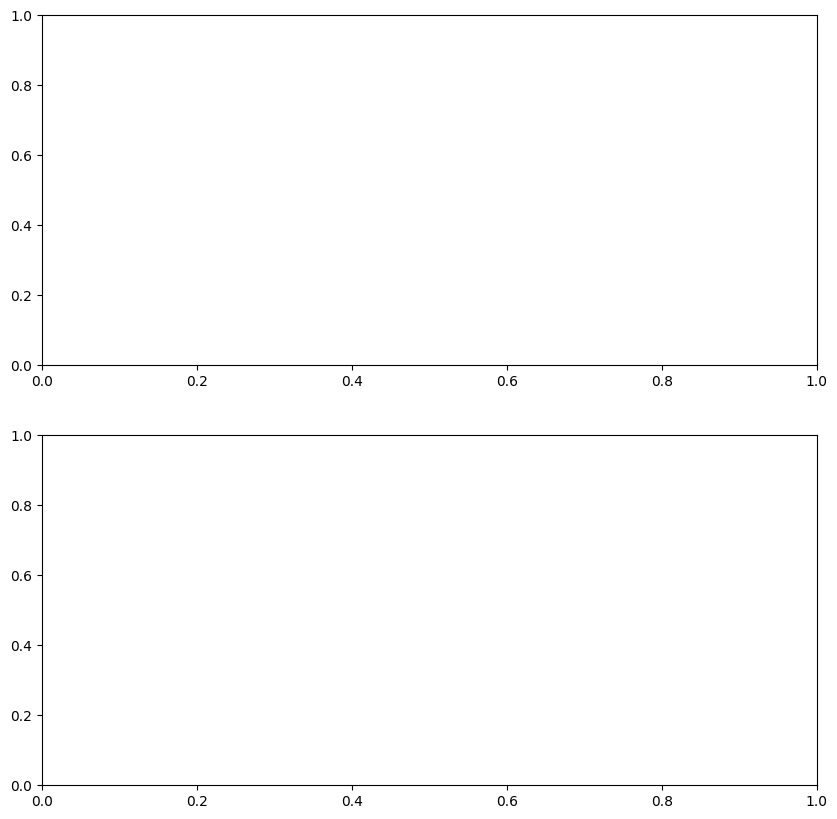

In [9]:
learning_rate = 1e-6
gamma=0.99
action_length = 32
epoch = 5
reward = "normal"
slow_start = True

agent_0, f1_score = main(learning_rate, gamma, action_length, epoch, reward, slow_start)

In [ ]:
print(f"Experiment 1,test_f1_score: {f1_score} ")